In [1]:
#Run the following code to print multiple outputs from a cell
get_ipython().ast_node_interactivity = 'all'

# Predictive Modeling

## Importing & Profiling the Data
The file we'll be using today is "creditCardDefaultReduced.csv". It contains information about Taiwanese credit card customers and includes the following fields:

* Payment: Paid or Missed
* Card: Type of card
* Education: Education level
* Marriage: Marital status
* Age: Age of customer
* BillAmt_1: Amount of last bill
* PayAmt_1: Amount of last payment
* Pay_0: Number of months delayed
* Limit_Bal: Balance of the customer's credit card limit

Import the file, "creditCardDefaultReduced.csv", and save it in a variable called `df`. Then, do some initial data profiling of the data. 

In [2]:
import pandas as pd
df = pd.read_csv("creditCardDefaultReduced.csv")
df

,Limit_Bal,Education,Marriage,Age,Pay_0,Bill_Amt1,Pay_Amt1,Payment,Card
0,20000,University,married,24,Delay2,3913,0,Missed,Normal
1,120000,University,single,26,ontime,2682,0,Missed,Normal
2,90000,University,single,34,Delay0,29239,1518,Paid,Normal
3,50000,University,married,37,Delay0,46990,2000,Paid,Normal
4,50000,University,married,57,ontime,8617,2000,Paid,Gold
...,...,...,...,...,...,...,...,...,...
29995,220000,High school,married,39,Delay0,188948,8500,Paid,Gold
29996,150000,High school,single,43,ontime,1683,1837,Paid,Gold
29997,30000,University,single,37,Delay4,3565,0,Missed,Gold
29998,80000,High school,married,41,Delay1,-1645,85900,Missed,Gold


In [3]:
df.dtypes
df.isna().sum()

Limit_Bal     int64
Education    object
Marriage     object
Age           int64
Pay_0        object
Bill_Amt1     int64
Pay_Amt1      int64
Payment      object
Card         object
dtype: object

Limit_Bal    0
Education    0
Marriage     0
Age          0
Pay_0        0
Bill_Amt1    0
Pay_Amt1     0
Payment      0
Card         0
dtype: int64

In [4]:
df.describe()

,Limit_Bal,Age,Bill_Amt1,Pay_Amt1
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,5663.580500
std,129747.661567,9.217904,73635.860576,16563.280354
min,10000.000000,21.000000,-165580.000000,0.000000
25%,50000.000000,28.000000,3558.750000,1000.000000
50%,140000.000000,34.000000,22381.500000,2100.000000
75%,240000.000000,41.000000,67091.000000,5006.000000
max,1000000.000000,79.000000,964511.000000,873552.000000


array([[<Axes: xlabel='Limit_Bal', ylabel='Limit_Bal'>,
        <Axes: xlabel='Age', ylabel='Limit_Bal'>,
        <Axes: xlabel='Bill_Amt1', ylabel='Limit_Bal'>,
        <Axes: xlabel='Pay_Amt1', ylabel='Limit_Bal'>],
       [<Axes: xlabel='Limit_Bal', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Bill_Amt1', ylabel='Age'>,
        <Axes: xlabel='Pay_Amt1', ylabel='Age'>],
       [<Axes: xlabel='Limit_Bal', ylabel='Bill_Amt1'>,
        <Axes: xlabel='Age', ylabel='Bill_Amt1'>,
        <Axes: xlabel='Bill_Amt1', ylabel='Bill_Amt1'>,
        <Axes: xlabel='Pay_Amt1', ylabel='Bill_Amt1'>],
       [<Axes: xlabel='Limit_Bal', ylabel='Pay_Amt1'>,
        <Axes: xlabel='Age', ylabel='Pay_Amt1'>,
        <Axes: xlabel='Bill_Amt1', ylabel='Pay_Amt1'>,
        <Axes: xlabel='Pay_Amt1', ylabel='Pay_Amt1'>]], dtype=object)

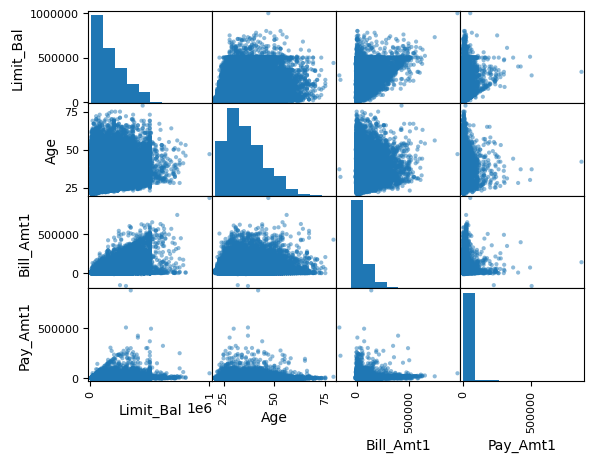

In [5]:
pd.plotting.scatter_matrix(df)

In [6]:
df["Payment"].value_counts(normalize = True)
df["Education"].value_counts(normalize = True)
df["Marriage"].value_counts(normalize = True)

Payment
Paid      0.7788
Missed    0.2212
Name: proportion, dtype: float64

Education
University         0.467667
Graduate school    0.352833
High school        0.163900
other              0.015600
Name: proportion, dtype: float64

Marriage
single     0.532133
married    0.455300
other      0.010767
unknown    0.001800
Name: proportion, dtype: float64

We want to explain the "Payment" column, so let's try to make a histogram to see if it's normally distributed:

<Axes: >

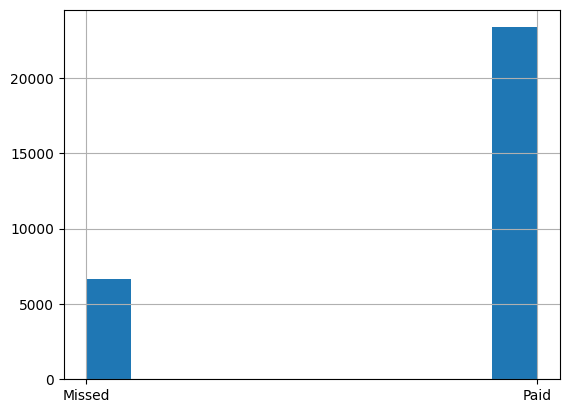

In [7]:
df["Payment"].hist()

This is not continuous data, so we'll use a classification model to predict whether someone will make or miss their payment.

## Outcome and Features

We need to create two inputs for machine learning models:
* Outcome: A single column of data that the model will try to explain
* Features: One or more columns of data that explain the outcome

We'll experiment with different models today, but all require an outcome and set of features.

### Outcome

Outcome is relatively simple since it's a single column:

In [8]:
outcome = df["Payment"]
outcome

0        Missed
1        Missed
2          Paid
3          Paid
4          Paid
          ...  
29995      Paid
29996      Paid
29997    Missed
29998    Missed
29999    Missed
Name: Payment, Length: 30000, dtype: object

### Features

We'll handle 2 types of data differently -- numeric and factors (categorical variables).

#### Numeric Features
First, the data has numeric variables like `Limit_Bal` and `Age`:

In [9]:
numericFeatures = df[["Limit_Bal", "Bill_Amt1", "Pay_Amt1", "Age"]]
numericFeatures

,Limit_Bal,Bill_Amt1,Pay_Amt1,Age
0,20000,3913,0,24
1,120000,2682,0,26
2,90000,29239,1518,34
3,50000,46990,2000,37
4,50000,8617,2000,57
...,...,...,...,...
29995,220000,188948,8500,39
29996,150000,1683,1837,43
29997,30000,3565,0,37
29998,80000,-1645,85900,41


#### Categorical Features
Second, the data has categorical columns.
* Despite all the discussion about new data (image, audio, video, etc.), models only work with numbers. Data needs to be numeric
* But we really, really, **really** want to use non-numeric data
* Some examples:
  - Colors? Red, green, blue
  - Day of the week? Sunday, Monday, Tuesday, ..., Saturday
  - School? Boston College, Notre Dame, Boston University
  - ...and many others
* What do we do?

Some data, like `Marriage` is a set of discrete values:

In [10]:
df["Marriage"].value_counts()

Marriage
single     15964
married    13659
other        323
unknown       54
Name: count, dtype: int64

`get_dummies` converts this data to multiple columns of true (1) and false (0) values:

In [11]:
dummiesMarriage = pd.get_dummies(df["Marriage"], prefix = "Marriage", drop_first = True)
dummiesMarriage

,Marriage_other,Marriage_single,Marriage_unknown
0,False,False,False
1,False,True,False
2,False,True,False
3,False,False,False
4,False,False,False
...,...,...,...
29995,False,False,False
29996,False,True,False
29997,False,True,False
29998,False,False,False


Now you try...create dummy variables for the `Card` and `Pay_0` variables:

In [12]:
dummiesCard = pd.get_dummies(df["Card"], prefix = "Card", drop_first = True)
dummiesPay_0 = pd.get_dummies(df["Pay_0"], prefix = "Pay_0", drop_first = True)

Now we need to combine all our features into a single variable using the `concat` command:

In [13]:
features = pd.concat([numericFeatures, dummiesMarriage, dummiesPay_0, dummiesCard], axis = 1)
features

,Limit_Bal,Bill_Amt1,Pay_Amt1,Age,Marriage_other,Marriage_single,Marriage_unknown,Pay_0_Delay1,Pay_0_Delay2,Pay_0_Delay3,Pay_0_Delay4,Pay_0_Delay5,Pay_0_Delay6,Pay_0_Delay7,Pay_0_Delay8+,Pay_0_ontime,Pay_0_unknown,Card_Normal
0,20000,3913,0,24,False,False,False,False,True,False,False,False,False,False,False,False,False,True
1,120000,2682,0,26,False,True,False,False,False,False,False,False,False,False,False,True,False,True
2,90000,29239,1518,34,False,True,False,False,False,False,False,False,False,False,False,False,False,True
3,50000,46990,2000,37,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,50000,8617,2000,57,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,188948,8500,39,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29996,150000,1683,1837,43,False,True,False,False,False,False,False,False,False,False,False,True,False,False
29997,30000,3565,0,37,False,True,False,False,False,False,True,False,False,False,False,False,False,False
29998,80000,-1645,85900,41,False,False,False,True,False,False,False,False,False,False,False,False,False,False


*The `axis = 1` parameter tells the `concat` function to combine by columns instead of by rows.*

Now, we have 2 variables:
* `outcome` contains the single column of data that we will try to explain
* `features` contains multiple columns of data that we believe explains the `outcome` variable

## Partitioning the Data
When we have sufficient data, we want to use only part of the data to train the model. By keeping part of the data as test data, we can better evaluate how well the model works.

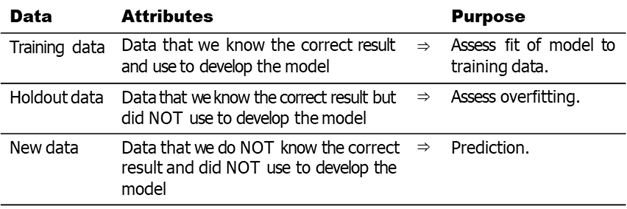

Why split the data?

What if you were trying to create a model to separate the dots?

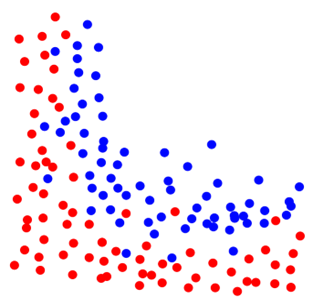

This model would be perfect on red, but not so great on blue:

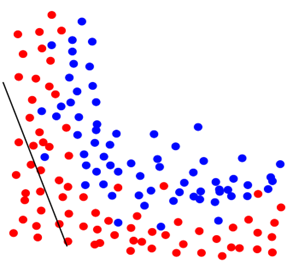

And this model would be perfect on blue, but not on red:

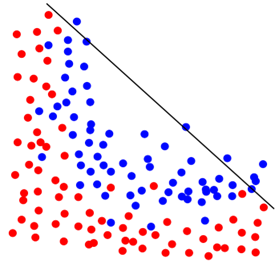

This, of course, is the perfect model, but it's perfect only for these specific dots (overfitting):

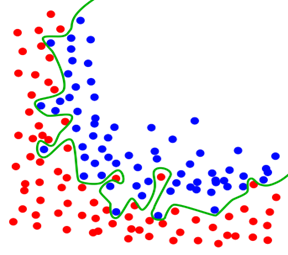

Risk of overfitting:
* Models can "memorize" the right answer.
* Inference diﬃcult.
* Encourages overconﬁdence in model.

This is ultimately a better balance between fitting these dots and fitting another set of dots:

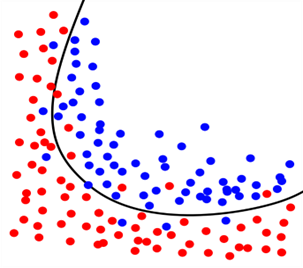

This balance is what we are trying to strike when we build our models.

We can use the `sklearn.model_selection.train_test_split` command to randomly split the data into subsets. It is an unusual function that returns four values. The `test_size` parameter indicates the portion to save for testing.

In [14]:
from sklearn.model_selection import train_test_split
featuresTrain, featuresTest, outcomeTrain, outcomeTest = train_test_split(features, 
                                                                          outcome, 
                                                                          test_size = 0.33, 
                                                                          random_state = 42)
featuresTrain.shape
featuresTest.shape
outcomeTrain.shape
outcomeTest.shape

(20100, 18)

(9900, 18)

(20100,)

(9900,)

Notice the parameter `random_state = 42`. If we didn't include this parameter, each of us would get a different split, resulting in different models. Setting the `random_state` ensures that "randomness" works exactly the same for each of us. It also ensures that your model results will be replicable each time you run your code. (FYI, you can set the `random_state` to whatever number you'd like...42 is my favorite number.)

## Building a Decision Tree

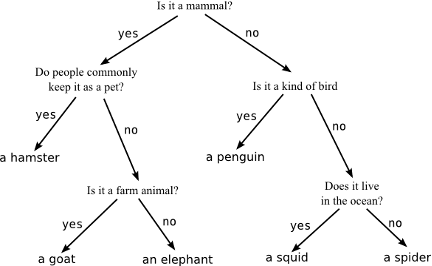

* A ﬂowchart-like structure
* Each internal node represents a test on an attribute
* Each branch represents the outcome of the test
* Each leaf node represents a class label
* The paths from root to leaf represent classiﬁcation rules.

Pros and cons?
* Simple
* White-box
* Sensitive to data ('high variance')
* May require many levels
* Generally low accuracy

Let's build the model. There are generally 4 steps:
```
1. Set-up the model
2. Fit the model using the training data
3. Use the fitted model to predict outcomes
4. Assess the fit
```

**1. Set-up the model:**

In [15]:
import sklearn.tree
modelTree = sklearn.tree.DecisionTreeClassifier(random_state = 42)

**2. Fit the model using the training data:**

In [16]:
resultTree = modelTree.fit(featuresTrain, outcomeTrain)

To actually see the tree, you can run this code:

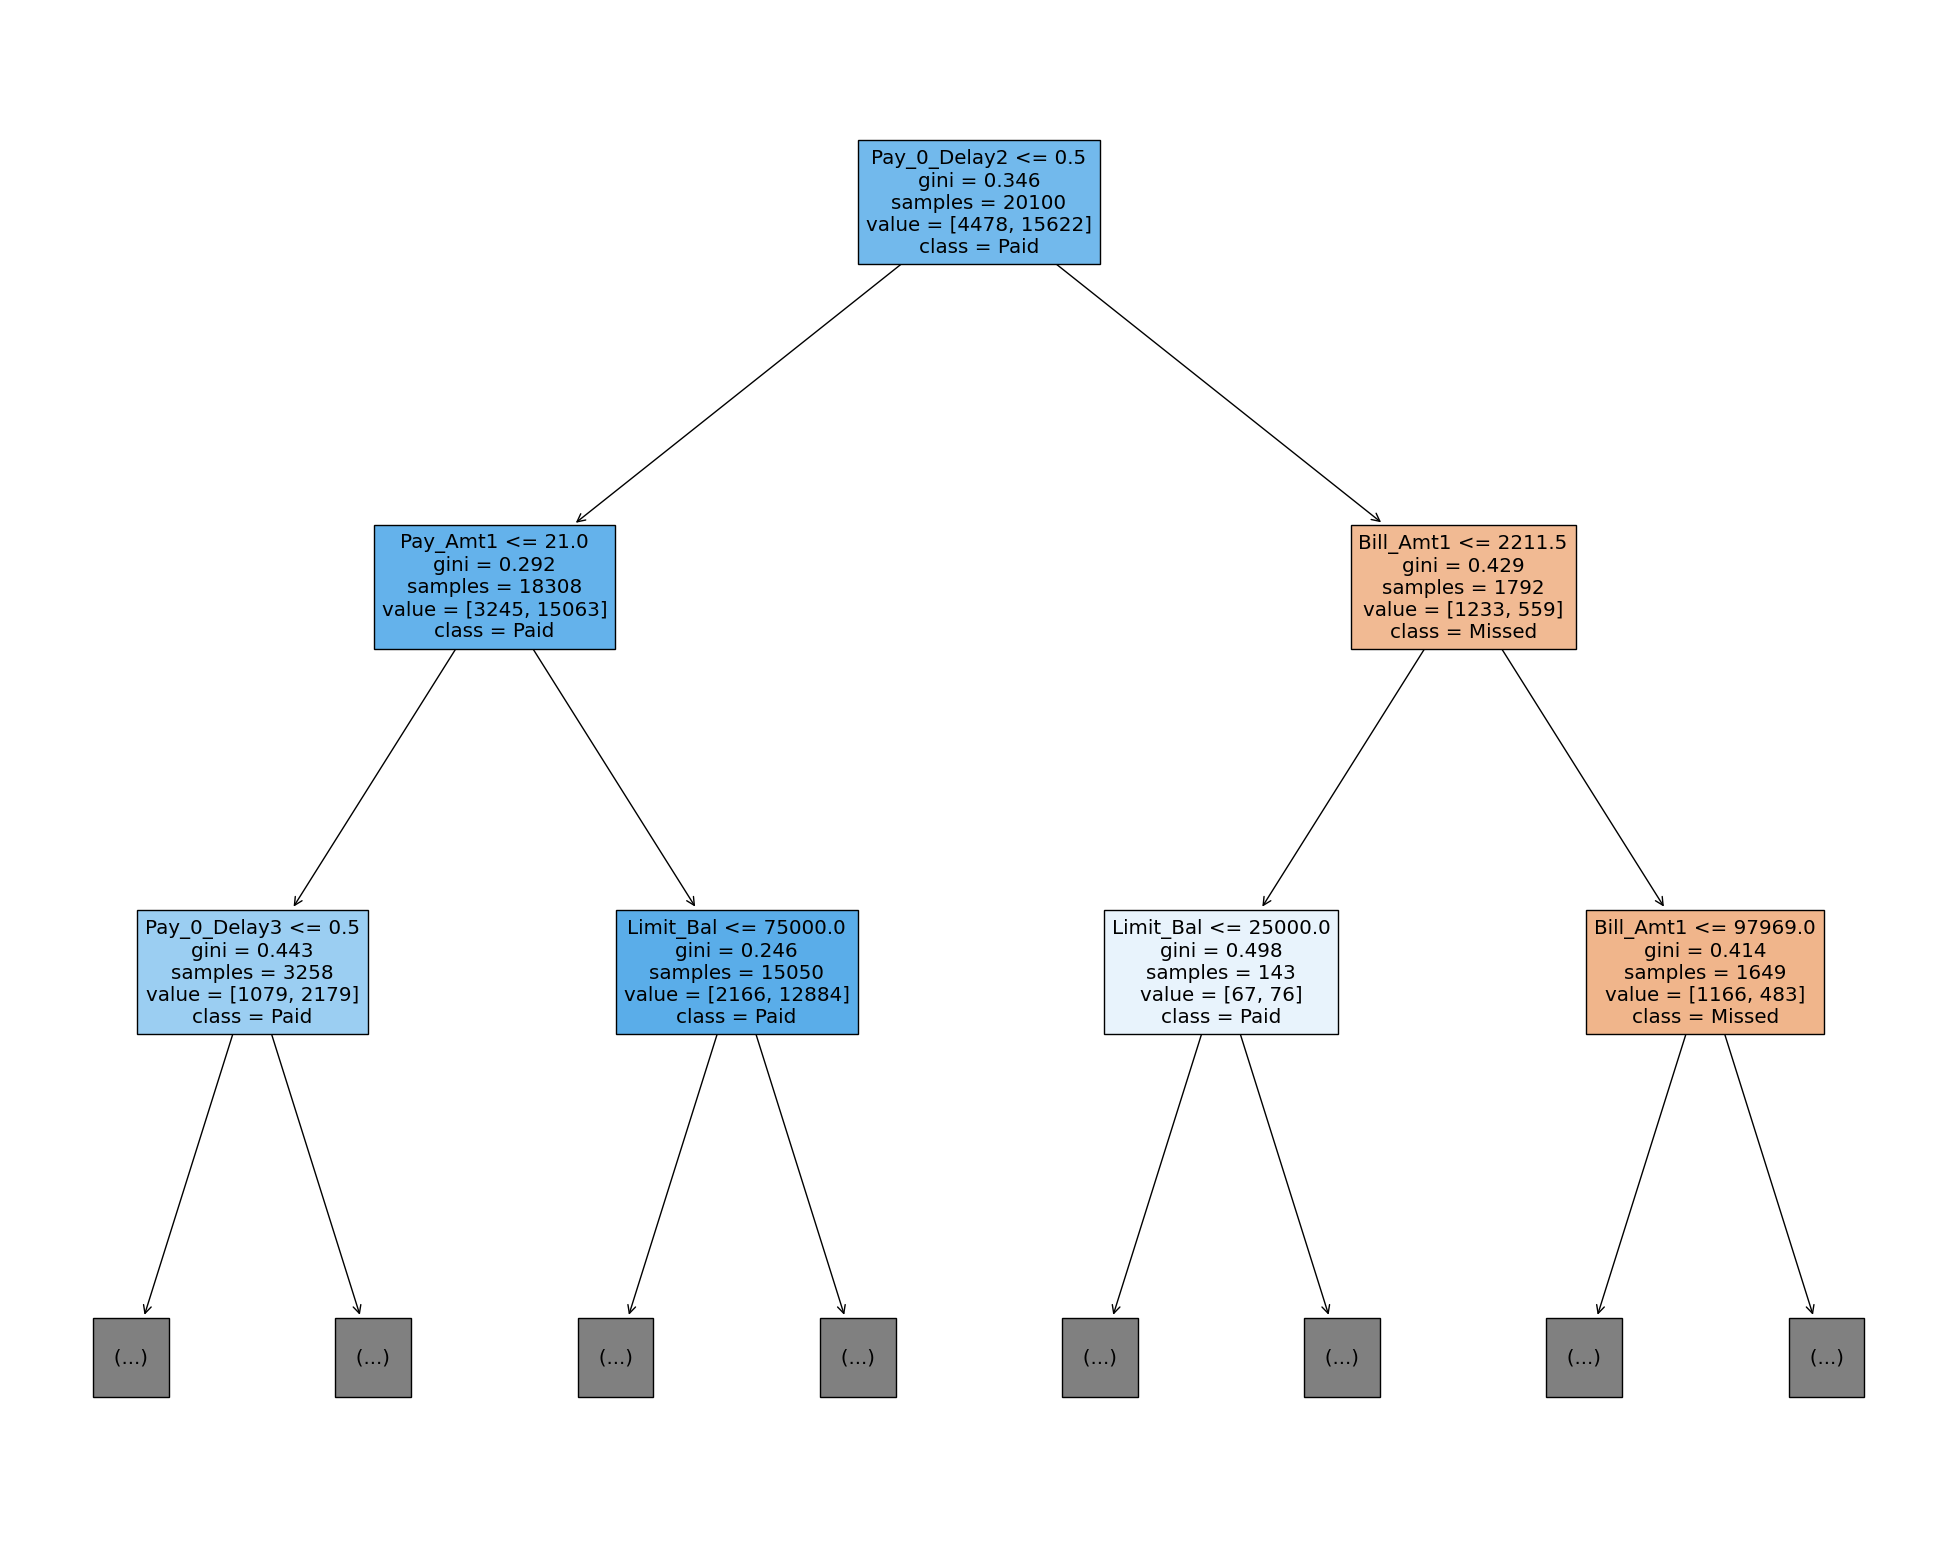

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = sklearn.tree.plot_tree(resultTree, feature_names = list(features), filled = True,\
                       class_names = modelTree.classes_.tolist(), max_depth = 2)

# To save the tree as a png file:
# fig.savefig("decision_tree.png")

You can also get a text printout of the entire tree using this command:

In [18]:
tree_rules = sklearn.tree.export_text(modelTree, feature_names=list(features))
print(tree_rules)

|--- Pay_0_Delay2 <= 0.50
|   |--- Pay_Amt1 <= 21.00
|   |   |--- Pay_0_Delay3 <= 0.50
|   |   |   |--- Limit_Bal <= 45000.00
|   |   |   |   |--- Bill_Amt1 <= 3936.00
|   |   |   |   |   |--- Marriage_single <= 0.50
|   |   |   |   |   |   |--- Bill_Amt1 <= 1476.00
|   |   |   |   |   |   |   |--- Pay_0_unknown <= 0.50
|   |   |   |   |   |   |   |   |--- Bill_Amt1 <= 1054.50
|   |   |   |   |   |   |   |   |   |--- Bill_Amt1 <= -1243.00
|   |   |   |   |   |   |   |   |   |   |--- class: Paid
|   |   |   |   |   |   |   |   |   |--- Bill_Amt1 >  -1243.00
|   |   |   |   |   |   |   |   |   |   |--- Bill_Amt1 <= 912.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |   |--- Bill_Amt1 >  912.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: Paid
|   |   |   |   |   |   |   |   |--- Bill_Amt1 >  1054.50
|   |   |   |   |   |   |   |   |   |--- class: Missed
|   |   |   |   |   |   |   |--- Pay_0_unknown >  0.50
|

**3. Use the fitted model to predict outcomes:**

In [19]:
predTreeTrain = modelTree.predict(featuresTrain)
predTreeTrain

array(['Missed', 'Paid', 'Missed', ..., 'Paid', 'Missed', 'Missed'],
      dtype=object)

**4. Assess the fit:**

In [20]:
sklearn.metrics.r2_score(outcomeTrain, featuresTrain) # this is wrong

ValueError: could not convert string to float: 'Missed'

What happened?

Metrics like $R^2$, mean squared error, mean absolute error, etc., make sense for regression, but not classification.

How can we tell if a model is good or bad?
* Depends on the reference
  - "Better or worse" more than "good or bad"
* Depends on the dependent variable
* Depends on the kind of model
* Depends on the goal

What outcomes are we trying to predict?

In [23]:
pd.Series(outcomeTrain).value_counts()

Payment
Paid      15622
Missed     4478
Name: count, dtype: int64

What did the model predict?

In [24]:
pd.Series(predTreeTrain).value_counts()

Paid      15597
Missed     4503
Name: count, dtype: int64

So, we know the prediction isn't perfect. But what did it miss? How imperfect?

### Confusion Matrix

Check the confusion matrix to assess the model's goodness of fit:

0.9976616915422886

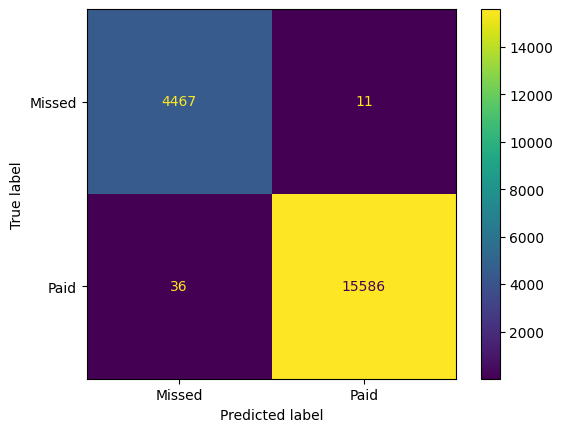

In [28]:
sklearn.metrics.accuracy_score(outcomeTrain, predTreeTrain)
cmTreeTrain = sklearn.metrics.confusion_matrix(outcomeTrain, predTreeTrain)
sklearn.metrics.ConfusionMatrixDisplay(cmTreeTrain, display_labels = modelTree.classes_).plot()

We can quickly look at many metrics with the `classification_report`:

In [29]:
print(sklearn.metrics.classification_report(outcomeTrain, predTreeTrain))

              precision    recall  f1-score   support

      Missed       0.99      1.00      0.99      4478
        Paid       1.00      1.00      1.00     15622

    accuracy                           1.00     20100
   macro avg       1.00      1.00      1.00     20100
weighted avg       1.00      1.00      1.00     20100



* Out of all the people that the model predicted Missed, 99% actually Missed
* Out of all the people that actually Missed, the model predicted 100% of them
* Out of all the people that the model predicted Paid, 100% actually Paid
* Out of all the people that actually Paid, the model predicted 100% of them
* Support tells us how many of each case are in the data

It's no surprise that the model does well on the training data that was used to build it. 

The real "test" (forgive the pun) is to see how the model fits the test data to assess overfitting:

              precision    recall  f1-score   support

      Missed       0.36      0.40      0.38      2158
        Paid       0.83      0.80      0.81      7742

    accuracy                           0.71      9900
   macro avg       0.59      0.60      0.60      9900
weighted avg       0.72      0.71      0.72      9900



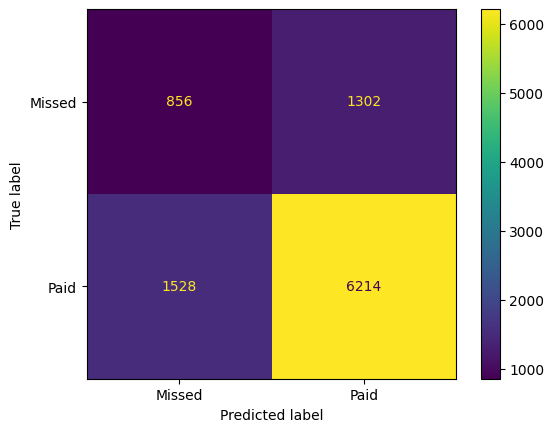

In [30]:
# First create the predictions on the test data
predTreeTest = modelTree.predict(featuresTest)

# Then assess the fit
cmTreeTest = sklearn.metrics.confusion_matrix(outcomeTest, predTreeTest)
sklearn.metrics.ConfusionMatrixDisplay(cmTreeTest, display_labels = modelTree.classes_).plot()
print(sklearn.metrics.classification_report(outcomeTest, predTreeTest))

* Out of all the people that the model predicted Missed, 36% actually Missed
* Out of all the people that actually Missed, the model predicted 40% of them
* Out of all the people that the model predicted Paid, 83% actually Paid
* Out of all the people that actually Paid, the model predicted 80% of them
* The overall accuracy is 71%

How did the model do at predicting new data?
* Bad overfitting
* Decision trees, while nice to look at, are terrible about overfit

## Random Forests

The steps are the same for random forests as they are for decision trees, with the exception that you use `sklearn.ensemble.RandomForestClassifier` to build the model:

              precision    recall  f1-score   support

      Missed       1.00      0.99      0.99      4478
        Paid       1.00      1.00      1.00     15622

    accuracy                           1.00     20100
   macro avg       1.00      1.00      1.00     20100
weighted avg       1.00      1.00      1.00     20100



              precision    recall  f1-score   support

      Missed       0.58      0.36      0.44      2158
        Paid       0.84      0.93      0.88      7742

    accuracy                           0.80      9900
   macro avg       0.71      0.64      0.66      9900
weighted avg       0.78      0.80      0.79      9900



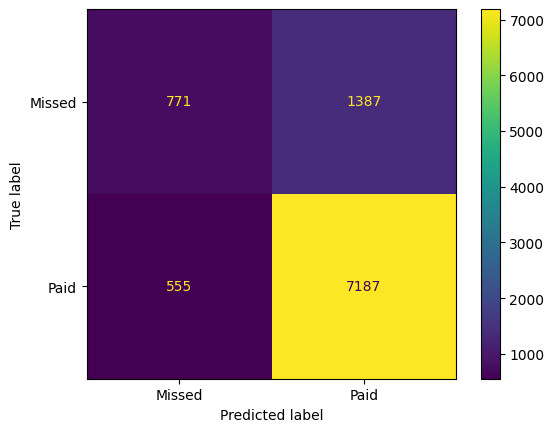

In [31]:
# 1. Set-up the model
import sklearn.ensemble
modelForest = sklearn.ensemble.RandomForestClassifier(random_state = 42)

# 2. Fit the model using the training data
resultForest = modelForest.fit(featuresTrain, outcomeTrain)

# 3. Predict outcomes from the training and testing data
predForestTrain = modelForest.predict(featuresTrain)
predForestTest = modelForest.predict(featuresTest)

# 4. Assess the fit
print(sklearn.metrics.classification_report(outcomeTrain, predForestTrain))
cmForestTest = sklearn.metrics.confusion_matrix(outcomeTest, predForestTest)
sklearn.metrics.ConfusionMatrixDisplay(cmForestTest, display_labels = modelForest.classes_).plot()
print(sklearn.metrics.classification_report(outcomeTest, predForestTest))

## Support Vector Machines

Now that you've seen how to build Decision Tree and Random Forest models, see if you can figure out how to build a Support Vector Machine model. You'll need to import `sklearn.svm` and the function is called `SVC()` (which stands for support vector classifier). Once again, use a `random_state` of 42.

Is your model better or worse than the previous 2 models?

/opt/tljh/user/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/tljh/user/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/tljh/user/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Missed       0.00      0.00      0.00      4478
        Paid       0.78      1.00      0.87     15622

    accuracy                           0.78     20100
   macro avg       0.39      0.50      0.44     20100
weighted avg       0.60      0.78      0.68     20100



/opt/tljh/user/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/tljh/user/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/tljh/user/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Missed       0.00      0.00      0.00      2158
        Paid       0.78      1.00      0.88      7742

    accuracy                           0.78      9900
   macro avg       0.39      0.50      0.44      9900
weighted avg       0.61      0.78      0.69      9900



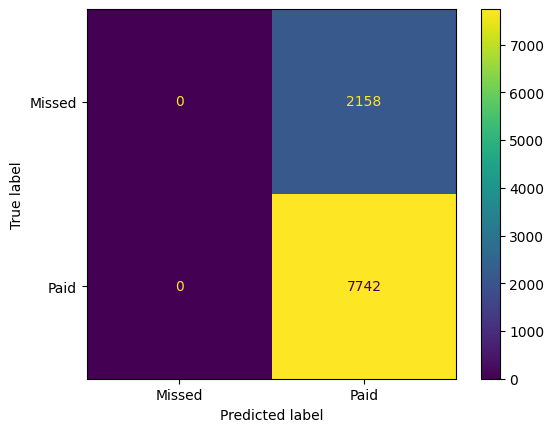

In [32]:
# 1. Set-up the model
import sklearn.svm
modelSVM = sklearn.svm.SVC(random_state = 42)

# 2. Fit the model using the training data
resultSVM = modelSVM.fit(featuresTrain, outcomeTrain)

# 3. Predict outcomes from the training and testing data
predSVMTrain = modelSVM.predict(featuresTrain)
predSVMTest = modelSVM.predict(featuresTest)

# 4. Assess the fit
print(sklearn.metrics.classification_report(outcomeTrain, predSVMTrain))
cmSVMTest = sklearn.metrics.confusion_matrix(outcomeTest, predSVMTest)
sklearn.metrics.ConfusionMatrixDisplay(cmSVMTest, display_labels = modelSVM.classes_).plot()
print(sklearn.metrics.classification_report(outcomeTest, predSVMTest))

## Scaling Your Features

You likely got warning messages when running your Support Vector Machine model because the model had difficulty predicting a missed payment. Part of this is due to the fact that the features are using different scales...for example, `Limit_Bal` ranges from 10,000 to 1,000,000 whereas `Age` ranges from 21 to 79. 

One way to fix this is to normalize your features so that they are all on the same scale. A very common way to do this is to convert all features to values between 0 and 1 with the following formula:

$$
X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

We can use the `MinMaxScaler()` in `sklearn.preprocessing` to do this:

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
featuresTrain_norm = scaler.fit_transform(featuresTrain) #you fit to the training features
featuresTest_norm = scaler.transform(featuresTest)       #you only transform the test features

Now, we can rerun the model using `featuresTrain_norm` instead of `featuresTrain` and we can get predictions using the normalized training and test data. 

Copy/paste your SVM model from above and edit it to use the normalized features. Did you get better results?

              precision    recall  f1-score   support

      Missed       0.70      0.33      0.45      4478
        Paid       0.83      0.96      0.89     15622

    accuracy                           0.82     20100
   macro avg       0.77      0.64      0.67     20100
weighted avg       0.80      0.82      0.79     20100



              precision    recall  f1-score   support

      Missed       0.70      0.32      0.44      2158
        Paid       0.84      0.96      0.89      7742

    accuracy                           0.82      9900
   macro avg       0.77      0.64      0.67      9900
weighted avg       0.80      0.82      0.79      9900



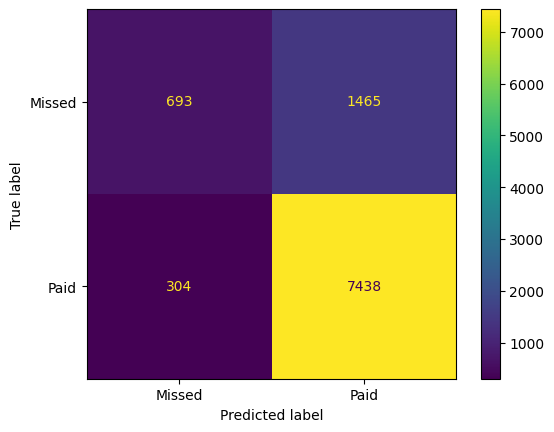

In [35]:
# 1. Set-up the model
modelSVMn = sklearn.svm.SVC(random_state = 42)

# 2. Fit the model using the training data
resultSVMn = modelSVMn.fit(featuresTrain_norm, outcomeTrain)

# 3. Predict outcomes from the training and testing data
predSVMTrainn = modelSVMn.predict(featuresTrain_norm)
predSVMTestn = modelSVMn.predict(featuresTest_norm)

# 4. Assess the fit
print(sklearn.metrics.classification_report(outcomeTrain, predSVMTrainn))
cmSVMTestn = sklearn.metrics.confusion_matrix(outcomeTest, predSVMTestn)
sklearn.metrics.ConfusionMatrixDisplay(cmSVMTestn, display_labels = modelSVMn.classes_).plot()
print(sklearn.metrics.classification_report(outcomeTest, predSVMTestn))

Note: Because Decision Trees and Random Forests are split on each feature itself and not compared to other features, it is generally preferred to keep them un-scaled and in their original state.

## Try Another...

Instead of repeating the class exercise, use the 3 models we covered in class to try to classify the Species of flower in the data set, "Iris.csv":

In [36]:
iris = pd.read_csv("Iris.csv")
iris
iris.dtypes
iris.isna().sum()
iris.describe()
iris["Species"].value_counts()
iris["Petal.Shape"].value_counts()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Petal.Shape
0,5.1,3.5,1.4,0.2,setosa,round
1,4.9,3.0,1.4,0.2,setosa,pointy
2,4.7,3.2,1.3,0.2,setosa,pointy
3,4.6,3.1,1.5,0.2,setosa,round
4,5.0,3.6,1.4,0.2,setosa,round
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,pointy
146,6.3,2.5,5.0,1.9,virginica,pointy
147,6.5,3.0,5.2,2.0,virginica,round
148,6.2,3.4,5.4,2.3,virginica,round


Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
Petal.Shape      object
dtype: object

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
Petal.Shape     0
dtype: int64

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Petal.Shape
round     79
pointy    71
Name: count, dtype: int64

### Set up your Outcome and Features

In [37]:
outcome1 = iris["Species"]
numericFeatures1 = iris[["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]]
dummyShape = pd.get_dummies(iris["Petal.Shape"], prefix = "Shape", drop_first = True)
features1 = pd.concat([numericFeatures1, dummyShape], axis = 1)
outcome1
features1

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Shape_round
0,5.1,3.5,1.4,0.2,True
1,4.9,3.0,1.4,0.2,False
2,4.7,3.2,1.3,0.2,False
3,4.6,3.1,1.5,0.2,True
4,5.0,3.6,1.4,0.2,True
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False
146,6.3,2.5,5.0,1.9,False
147,6.5,3.0,5.2,2.0,True
148,6.2,3.4,5.4,2.3,True


### Partition the Data

In [38]:
from sklearn.model_selection import train_test_split
featuresTrain1, featuresTest1, outcomeTrain1, outcomeTest1 = train_test_split(features1, outcome1, test_size = 0.33, random_state = 42)

### Decision Tree

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        31
  versicolor       1.00      1.00      1.00        35
   virginica       1.00      1.00      1.00        34

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



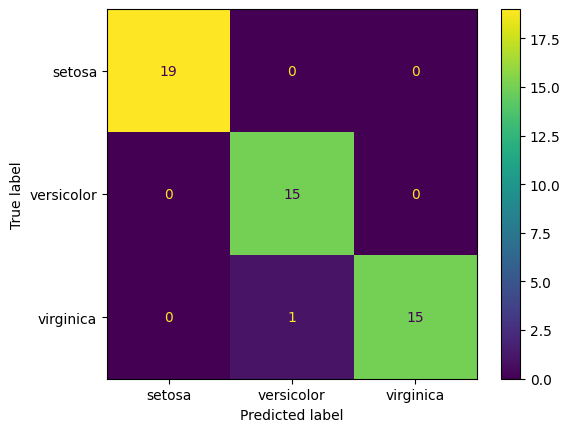

In [39]:
# 1. Set-up the model
import sklearn.tree
modelTree1 = sklearn.tree.DecisionTreeClassifier(random_state = 42)

# 2. Fit the model using the training data
resultTree1 = modelTree1.fit(featuresTrain1, outcomeTrain1)

# 3. Predict outcomes from the training and testing data
predTreeTrain1 = modelTree1.predict(featuresTrain1)
predTreeTest1 = modelTree1.predict(featuresTest1)

# 4. Assess the fit
print(sklearn.metrics.classification_report(outcomeTrain1, predTreeTrain1))
cmTreeTest1 = sklearn.metrics.confusion_matrix(outcomeTest1, predTreeTest1)
sklearn.metrics.ConfusionMatrixDisplay(cmTreeTest1, display_labels = modelTree1.classes_).plot()
print(sklearn.metrics.classification_report(outcomeTest1, predTreeTest1))

### Random Forest

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        31
  versicolor       1.00      1.00      1.00        35
   virginica       1.00      1.00      1.00        34

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



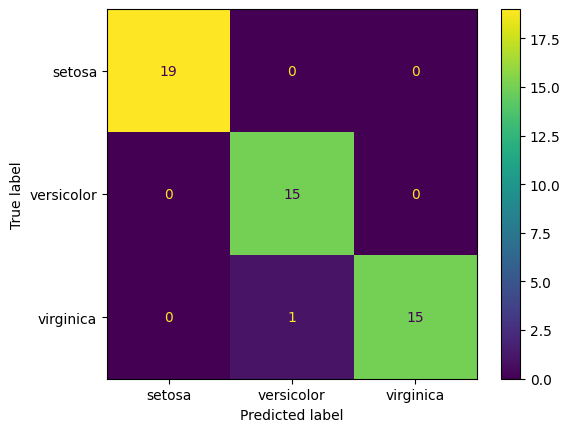

In [40]:
# 1. Set-up the model
import sklearn.ensemble
modelForest1 = sklearn.ensemble.RandomForestClassifier(random_state = 42)

# 2. Fit the model using the training data
resultForest1 = modelForest1.fit(featuresTrain1, outcomeTrain1)

# 3. Predict outcomes from the training and testing data
predForestTrain1 = modelForest1.predict(featuresTrain1)
predForestTest1 = modelForest1.predict(featuresTest1)

# 4. Assess the fit
print(sklearn.metrics.classification_report(outcomeTrain1, predForestTrain1))
cmForestTest1 = sklearn.metrics.confusion_matrix(outcomeTest1, predForestTest1)
sklearn.metrics.ConfusionMatrixDisplay(cmForestTest1, display_labels = modelForest1.classes_).plot()
print(sklearn.metrics.classification_report(outcomeTest1, predForestTest1))

### Support Vector Machine

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        31
  versicolor       0.97      0.91      0.94        35
   virginica       0.92      0.97      0.94        34

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



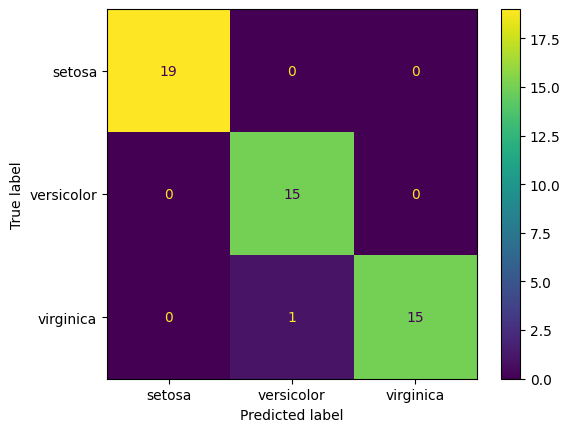

In [41]:
# Normalize the features
featuresTrain1_norm = scaler.fit_transform(featuresTrain1)
featuresTest1_norm = scaler.fit_transform(featuresTest1)

# 1. Set-up the model
modelSVM1 = sklearn.svm.SVC(random_state = 42)

# 2. Fit the model using the training data
resultSVM1 = modelSVM1.fit(featuresTrain1_norm, outcomeTrain1)

# 3. Predict outcomes from the training and testing data
predSVMTrain1 = modelSVM1.predict(featuresTrain1_norm)
predSVMTest1 = modelSVM1.predict(featuresTest1_norm)

# 4. Assess the fit
print(sklearn.metrics.classification_report(outcomeTrain1, predSVMTrain1))
cmSVMTest1 = sklearn.metrics.confusion_matrix(outcomeTest1, predSVMTest1)
sklearn.metrics.ConfusionMatrixDisplay(cmSVMTest1, display_labels = modelSVM1.classes_).plot()
print(sklearn.metrics.classification_report(outcomeTest1, predSVMTest1))